In [1]:
%matplotlib inline

In [380]:
import itertools 
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

import numpy as np
import pandas as pd

# (scale, length, randomness).)
#plt.xkcd()
import highlight_text as ht

import intro_plots as ip
from papercolors import colordict as pcd

paper_path = Path('../figures/')


In [381]:
# tau 
df = pd.read_csv("plot_data")

In [427]:
df['AC'] = df['NAME'].replace(ip.airport_codes)

In [453]:
df

,NAME,TEMP (°F),PRCP (in.),NEW YORK LAGUARDIA AP,ALBANY AP,NEW YORK JFK INTL AP,ISLIP LI MACARTHUR AP,ROCHESTER GTR INTL AP,AC
0,NEW YORK LAGUARDIA AP,34.0,0.6614,0.000000,1.964987,0.183772,0.778735,4.458209,LGA
1,ALBANY AP,-27.0,0.2598,1.964987,0.000000,2.105025,2.073629,3.885503,ALB
2,NEW YORK JFK INTL AP,22.0,0.6299,0.183772,2.105025,0.000000,0.678512,4.632957,JFK
3,ISLIP LI MACARTHUR AP,21.0,0.5984,0.778735,2.073629,0.678512,0.000000,5.130889,ISP
4,ROCHESTER GTR INTL AP,-2.0,0.2205,4.458209,3.885503,4.632957,5.130889,0.000000,ROC


In [462]:
df['TC'] = df['TEMP (°F)'].astype(str) + ' °F'
df['PC'] = df['PRCP (in.)'].astype(str) + ' in.'
df['color'] = df['NAME'].replace(ip.cdict)

In [463]:
df

,NAME,TEMP (°F),PRCP (in.),NEW YORK LAGUARDIA AP,ALBANY AP,NEW YORK JFK INTL AP,ISLIP LI MACARTHUR AP,ROCHESTER GTR INTL AP,AC,TC,PC,Color,color
0,NEW YORK LAGUARDIA AP,34.0,0.6614,0.000000,1.964987,0.183772,0.778735,4.458209,LGA,34.0 °F,0.6614 in.,#f58231,#f58231
1,ALBANY AP,-27.0,0.2598,1.964987,0.000000,2.105025,2.073629,3.885503,ALB,-27.0 °F,0.2598 in.,#469990,#469990
2,NEW YORK JFK INTL AP,22.0,0.6299,0.183772,2.105025,0.000000,0.678512,4.632957,JFK,22.0 °F,0.6299 in.,#000075,#000075
3,ISLIP LI MACARTHUR AP,21.0,0.5984,0.778735,2.073629,0.678512,0.000000,5.130889,ISP,21.0 °F,0.5984 in.,#ffe119,#ffe119
4,ROCHESTER GTR INTL AP,-2.0,0.2205,4.458209,3.885503,4.632957,5.130889,0.000000,ROC,-2.0 °F,0.2205 in.,#800000,#800000


In [515]:
drows = df[['AC', 'TC', 'PC']].loc[[0,2]]
vrows = df[['color','TEMP (°F)', 'PRCP (in.)']].loc[[0,2]]

In [516]:
for i, r in rows.iterrows():
    print(i, r.values.astype(str).T)

0 ['LGA' '34.0' '0.6614']
2 ['JFK' '22.0' '0.6299']


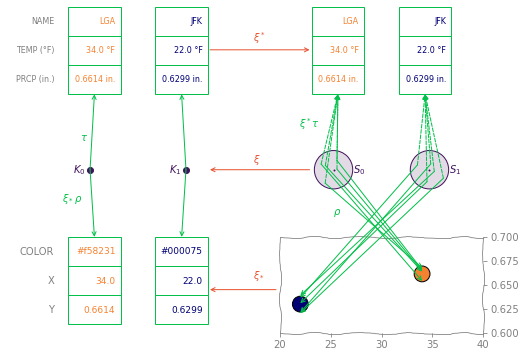

In [531]:
fig, axd = plt.subplot_mosaic([['tau', 'tau_pull'], ['k', 's'], ['rho_push', 'rho']], figsize=(8,6))
x = [-0, 1]
y = [.5]*len(x)
# K
axd['k'].scatter(x,y, color=pcd['base'])
axd['k'].axis('off')
axd['k'].set(aspect='equal', ylim=(0, 1), xlim=(-.5, 1.5))

for i, xi in enumerate(x):
    axd['k'].text(xi-.05, y[0], f"$K_{i}$", color=pcd['base'], ha='right', va='center')
    axd['s'].text(xi+.2, y[0], f"$S_{i}$", color=pcd['base'], ha='left', va='center')
#S
radius = .2
axd['s'].scatter(x,y, color=pcd['base'], s=1)
[axd['s'].add_patch(mpatches.Circle((xi,yi), radius=radius, edgecolor=pcd['base'], 
                                    facecolor=mcolors.to_rgba(pcd['base'], alpha=.15)))
                     for xi, yi in zip(x, y)]
axd['s'].axis('off')
axd['s'].set(aspect='equal', ylim=(0, 1), xlim=(-.5, 1.5))

width = .6
height = 1

values = [('tau', [['NAME'],['TEMP (°F)'], ['PRCP (in.)']]), 
          ('rho_push', [['COLOR'],['X'], ['Y']])]

bbox = [-1, 0, width, height]
for axn, data in values:
    tab = axd[axn].table(data, transform=axd[axn].transData, bbox=bbox)
    for i in range(3): 
        tab[i,0].set_edgecolor('white')
        tab[i,0].get_text().set_color('gray')

for axn in ['tau', 'tau_pull']:
    for i, (ind, r) in enumerate(drows.iterrows()):
        # double nest for columns
        width = .6
        bbox = [x[i]- width/2, 0 , width , 1] 
        tab = axd[axn].table([[rv] for rv in r.values.astype(str).T], 
                       bbox=bbox, transform=axd[axn].transData)
        for ri in range(len(r)):
            tab[ri,0].set_edgecolor(pcd['section'])
            tab[ri,0].get_text().set_color(ip.cdict[ip.rac[r['AC']]])




for i, (ind, r) in enumerate(vrows.iterrows()):
    # double nest for columns

    bbox = [x[i]- width/2, 0 , width , height] 
    tab = axd['rho_push'].table([[rv] for rv in r.values.astype(str).T], 
                   bbox=bbox, transform=axd['rho_push'].transData)
    for ri in range(len(r)):
        tab[ri,0].set_edgecolor(pcd['section'])
        tab[ri,0].get_text().set_color(r['color'])
    
for axn in ['tau', 'tau_pull', 'rho_push']:
    axd[axn].set(xlim=(-.5, 1.5), ylim=(-.1,1), aspect='equal')
    axd[axn].axis('off')


axd['rho'].scatter('TEMP (°F)', 'PRCP (in.)', data=vrows, color=vrows['color'], s=250, edgecolor='k')
axd['rho'].set(xlim=(20, 40), ylim=(.6, .7))
axd['rho'].tick_params(right=True, left=False, labelleft=False, labelright=True)



for i, (inf, row) in enumerate(vrows.iterrows()):
    xi = x[i]
    at = mpatches.ConnectionPatch((xi,.5), (xi, -.005), 
                                  coordsA=axd['k'].transData, coordsB=axd['tau'].transData,
                                  color=pcd['section'], arrowstyle="->",)
    arp = mpatches.ConnectionPatch((xi,.5), (xi, 1), 
                                  coordsA=axd['k'].transData, coordsB=axd['rho_push'].transData,
                                  color=pcd['section'], arrowstyle="->",)
    fig.add_artist(at)
    fig.add_artist(arp)
    
    margin = .0095
    xm = row['TEMP (°F)']
    ym = row['PRCP (in.)']
    xt = np.random.uniform(low = xm-margin, high = xm+margin, size=10)
    yt = np.random.uniform(low = ym-margin, high = ym+margin, size=10)
    for j, (xs,ys) in enumerate(zip(np.random.uniform(low=xi-radius+.05, high=xi+radius-.05, size=5),
                       np.random.uniform(low=.5-radius+.05, high=.5+radius-.05, size=5))):
        atp = mpatches.ConnectionPatch((xs,ys), (xi, -.005), 
                                  coordsA=axd['s'].transData, coordsB=axd['tau_pull'].transData,
                                  color=pcd['section'], arrowstyle="->",linestyle='--')
       
        ar = mpatches.ConnectionPatch((xs,ys), (xt[j], yt[j]), 
                                  coordsA=axd['s'].transData, coordsB=axd['rho'].transData,
                                  color=pcd['section'], arrowstyle="->",)
        fig.add_artist(atp)
        fig.add_artist(ar)  

fig.text(.2, .57, r'$\tau$', color=pcd['section'])
fig.text(.17, .43, r'$\xi_*\rho$', color=pcd['section'])
fig.text(.58, .6, r'$\xi^*\tau$', color=pcd['section'])
fig.text(.64, .4, r'$\rho$', color=pcd['section'])
        
fig.text(.5, .25, r"$\xi_*$", color=pcd['functor'])
push = mpatches.ConnectionPatch((-.6,-.75), (1.25, -.75), 
                                  coordsA=axd['s'].transData, coordsB=axd['k'].transData,
                                  color=pcd['functor'], arrowstyle="->")
fig.add_artist(push)

fig.text(.5, .8, r"$\xi^*$", color=pcd['functor'])
pull = mpatches.ConnectionPatch((1.25, 1.75), (-.25, 1.75), 
                                  coordsA=axd['k'].transData, coordsB=axd['s'].transData,
                                  color=pcd['functor'], arrowstyle="->")
fig.add_artist(pull)
fig.text(.5, .52, r"$\xi$", color=pcd['functor'])
vind = mpatches.ConnectionPatch((-.25,.5), (1.25, .5), 
                                  coordsA=axd['s'].transData, coordsB=axd['k'].transData,
                                  color=pcd['functor'], arrowstyle="->")
fig.add_artist(vind)
    

axd['rho'].spines[:].set_sketch_params(1, 100, 10)
axd['rho'].spines[:].set_color('gray')
axd['rho'].tick_params(colors='gray')
fig.savefig('../figures/xi_scatter.png', dpi=500, bbox_inches='tight')

In [966]:
    base = mpatches.Ellipse((1, .25), width=1.4, height=.2, facecolor='none', 
                            edgecolor=pcd['base'], lw=2)